In [166]:

import pandas as pd 
from pathlib import Path
import hvplot.pandas
import requests
from scipy.stats import linregress
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.colors as mcolors






In [167]:
austin_texas = ("Crime_Reports.csv")
austin_texas


'Crime_Reports.csv'

In [168]:
austin_texas_df = pd.read_csv(austin_texas, low_memory= False, parse_dates=True)
austin_texas_df

#"ISO-8859-1"

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2006471156,FAMILY DISTURBANCE,3400,N,02/16/2006 02:25:00 PM,02/16/2006,1425.0,02/16/2006 02:25:00 PM,02/16/2006,1425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20045044338,TAMPERING WITH ID NUMBER,2719,N,09/14/2004 03:32:00 PM,09/14/2004,1532.0,09/14/2004 03:32:00 PM,09/14/2004,1532.0,...,NaN,N,09/14/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006960811,FAMILY DISTURBANCE,3400,N,04/06/2006 10:29:00 AM,04/06/2006,1029.0,04/06/2006 10:29:00 AM,04/06/2006,1029.0,...,NaN,N,05/01/2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013851154,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,01/01/2009 12:01:00 AM,01/01/2009,1.0,03/26/2013 04:56:00 PM,03/26/2013,1656.0,...,4.00,C,04/11/2013,11C,Rape,0.0,0.0,NaN,NaN,NaN
4,20161800084,RAPE OF A CHILD,204,Y,06/28/2016 01:05:00 AM,06/28/2016,105.0,06/28/2016 01:05:00 AM,06/28/2016,105.0,...,24.41,C,07/01/2016,11A,Rape,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419618,20215001631,DEBIT CARD ABUSE,1108,N,09/24/2020 12:00:00 PM,09/24/2020,1200.0,01/13/2021 10:27:00 AM,01/13/2021,1027.0,...,24.47,N,01/14/2021,NaN,NaN,3118294.0,10050405.0,30.211876,-97.731707,"(30.2118759, -97.73170695)"
2419619,20105013578,BURGLARY OF VEHICLE,601,N,03/19/2010 07:00:00 PM,03/19/2010,1900.0,03/19/2010 11:16:00 PM,03/19/2010,2316.0,...,19.11,N,03/25/2010,23F,Theft,3105575.0,10069711.0,30.265757,-97.770554,"(30.2657568, -97.77055439)"
2419620,20085066651,PROTECTIVE ORDER,3829,N,12/16/2008 03:56:00 PM,12/16/2008,1556.0,12/16/2008 03:56:00 PM,12/16/2008,1556.0,...,13.00,NaN,NaN,NaN,NaN,3105754.0,10060029.0,30.239131,-97.770694,"(30.23913102, -97.77069399)"
2419621,20101570072,VIOL CITY ORDINANCE - OTHER,3299,N,06/06/2010 12:31:00 AM,06/06/2010,31.0,06/06/2010 12:31:00 AM,06/06/2010,31.0,...,431.00,C,08/07/2010,NaN,NaN,3130528.0,10104030.0,30.358489,-97.688952,"(30.35848873, -97.68895198)"


In [169]:
#Drop unnecessary columns

austin_texas_df = austin_texas_df.drop(columns=['Census Tract', 'Clearance Status', 'APD Sector', 'Council District', 'APD District',
                                  'PRA', 'Incident Number', 'Occurred Time',
                                 'Report Date', 'Report Time', 'X-coordinate', 'Y-coordinate',
                                 'Latitude', 'Longitude', 'Location', 'UCR Category','Highest Offense Code'
                                 ])

austin_texas_df.head(12)

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Report Date Time,Location Type,Address,Zip Code,Clearance Date,Category Description
0,FAMILY DISTURBANCE,N,02/16/2006 02:25:00 PM,02/16/2006,02/16/2006 02:25:00 PM,RESIDENCE / HOME,7000 DECKER 1422,NaN,NaN,NaN
1,TAMPERING WITH ID NUMBER,N,09/14/2004 03:32:00 PM,09/14/2004,09/14/2004 03:32:00 PM,NaN,3301 CR 100,NaN,09/14/2004,NaN
2,FAMILY DISTURBANCE,N,04/06/2006 10:29:00 AM,04/06/2006,04/06/2006 10:29:00 AM,RESIDENCE / HOME,5005 W FRANCES PL,NaN,05/01/2006,NaN
3,SEXUAL ASSAULT OF CHILD/OBJECT,Y,01/01/2009 12:01:00 AM,01/01/2009,03/26/2013 04:56:00 PM,RESIDENCE / HOME,900 BLOCK E 32ND ST,78705.0,04/11/2013,Rape
4,RAPE OF A CHILD,Y,06/28/2016 01:05:00 AM,06/28/2016,06/28/2016 01:05:00 AM,RESIDENCE / HOME,6900 BLOCK BRANCHWOOD DR,78744.0,07/01/2016,Rape
5,RAPE,Y,03/04/2010 07:15:00 PM,03/04/2010,03/11/2010 05:06:00 PM,RESIDENCE / HOME,400 BLOCK ANGEL OAK ST,78748.0,03/18/2010,Rape
6,RAPE,N,07/01/2007 12:00:00 PM,07/01/2007,07/01/2007 12:00:00 PM,RESIDENCE / HOME,1700 BLOCK WOOTEN DR,78757.0,08/02/2007,Rape
7,SEXUAL ASSAULT W/ OBJECT,N,08/07/2006 10:28:00 PM,08/07/2006,08/07/2006 10:28:00 PM,RESIDENCE / HOME,500 BLOCK E OLTORF ST,78704.0,08/22/2006,Rape
8,PROTECTIVE ORDER,N,12/04/2018 02:53:00 PM,12/04/2018,12/04/2018 02:53:00 PM,RESIDENCE / HOME,UNKNOWN,NaN,12/04/2018,NaN
9,EXPLOSIVE ORDNANCE DISPOSAL,N,07/20/2007 02:00:00 AM,07/20/2007,07/20/2007 02:00:00 AM,RESIDENCE / HOME,1711 WESTHEIMER DR,NaN,NaN,NaN


In [170]:
# Drop any duplicates that may be in the data set 
clean_crime_data_df = austin_texas_df.drop_duplicates()

#print out the clean data
clean_crime_data_df.count()

Highest Offense Description    2418874
Family Violence                2418874
Occurred Date Time             2418737
Occurred Date                  2418874
Report Date Time               2418873
Location Type                  2399982
Address                        2418862
Zip Code                       2409916
Clearance Date                 2075260
Category Description            890591
dtype: int64

In [171]:
#print out the amount the crime occurred for each particular crime

clean_crime_data_df['Highest Offense Description'].value_counts()



BURGLARY OF VEHICLE               250481
THEFT                             226705
FAMILY DISTURBANCE                203995
CRIMINAL MISCHIEF                 139843
ASSAULT W/INJURY-FAM/DATE VIOL     86737
                                   ...  
COERCION OF PUBLIC SERVANT             1
SALE OF DXM TO MINOR                   1
EXPIRED-ATT FORCED SODOMY              1
VIOL OF PRISONERS RIGHT                1
CRASH/NEGLIGENT HOMICIDE               1
Name: Highest Offense Description, Length: 433, dtype: int64

In [172]:
#create another column that extracts only the year from "Ocurred Date" and name it "Date Stamp"
clean_crime_data_df['Date Stamp'] = pd.DatetimeIndex(clean_crime_data_df['Occurred Date']).year
clean_crime_data_df

/var/folders/26/x6_l2qcn2kj_kcgkkfht28580000gn/T/ipykernel_22371/3865811516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_crime_data_df['Date Stamp'] = pd.DatetimeIndex(clean_crime_data_df['Occurred Date']).year


,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Report Date Time,Location Type,Address,Zip Code,Clearance Date,Category Description,Date Stamp
0,FAMILY DISTURBANCE,N,02/16/2006 02:25:00 PM,02/16/2006,02/16/2006 02:25:00 PM,RESIDENCE / HOME,7000 DECKER 1422,NaN,NaN,NaN,2006
1,TAMPERING WITH ID NUMBER,N,09/14/2004 03:32:00 PM,09/14/2004,09/14/2004 03:32:00 PM,NaN,3301 CR 100,NaN,09/14/2004,NaN,2004
2,FAMILY DISTURBANCE,N,04/06/2006 10:29:00 AM,04/06/2006,04/06/2006 10:29:00 AM,RESIDENCE / HOME,5005 W FRANCES PL,NaN,05/01/2006,NaN,2006
3,SEXUAL ASSAULT OF CHILD/OBJECT,Y,01/01/2009 12:01:00 AM,01/01/2009,03/26/2013 04:56:00 PM,RESIDENCE / HOME,900 BLOCK E 32ND ST,78705.0,04/11/2013,Rape,2009
4,RAPE OF A CHILD,Y,06/28/2016 01:05:00 AM,06/28/2016,06/28/2016 01:05:00 AM,RESIDENCE / HOME,6900 BLOCK BRANCHWOOD DR,78744.0,07/01/2016,Rape,2016
...,...,...,...,...,...,...,...,...,...,...,...
2419618,DEBIT CARD ABUSE,N,09/24/2020 12:00:00 PM,09/24/2020,01/13/2021 10:27:00 AM,OTHER / UNKNOWN,3800 DROSSETT DR,78744.0,01/14/2021,NaN,2020
2419619,BURGLARY OF VEHICLE,N,03/19/2010 07:00:00 PM,03/19/2010,03/19/2010 11:16:00 PM,FIELD / WOODS,2201 ANDREW ZILKER RD,78746.0,03/25/2010,Theft,2010
2419620,PROTECTIVE ORDER,N,12/16/2008 03:56:00 PM,12/16/2008,12/16/2008 03:56:00 PM,RESIDENCE / HOME,1106 WEATHERS LN,78704.0,NaN,NaN,2008
2419621,VIOL CITY ORDINANCE - OTHER,N,06/06/2010 12:31:00 AM,06/06/2010,06/06/2010 12:31:00 AM,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,675 E RUNDBERG LN,78753.0,08/07/2010,NaN,2010


In [173]:
#Get all the data associated with the years 2018-2021
clean_crime_data_df = clean_crime_data_df.loc[(clean_crime_data_df["Date Stamp"] >= 2010) & (clean_crime_data_df["Date Stamp"] <= 2021)]
clean_crime_data_df

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Report Date Time,Location Type,Address,Zip Code,Clearance Date,Category Description,Date Stamp
4,RAPE OF A CHILD,Y,06/28/2016 01:05:00 AM,06/28/2016,06/28/2016 01:05:00 AM,RESIDENCE / HOME,6900 BLOCK BRANCHWOOD DR,78744.0,07/01/2016,Rape,2016
5,RAPE,Y,03/04/2010 07:15:00 PM,03/04/2010,03/11/2010 05:06:00 PM,RESIDENCE / HOME,400 BLOCK ANGEL OAK ST,78748.0,03/18/2010,Rape,2010
8,PROTECTIVE ORDER,N,12/04/2018 02:53:00 PM,12/04/2018,12/04/2018 02:53:00 PM,RESIDENCE / HOME,UNKNOWN,NaN,12/04/2018,NaN,2018
11,ASSAULT CONTACT-SEXUAL NATURE,N,05/21/2019 08:52:00 AM,05/21/2019,05/21/2019 08:52:00 AM,OTHER / UNKNOWN,BU00 BLOCK CREEK COVE,NaN,05/23/2019,NaN,2019
12,ASSAULT CONTACT-SEXUAL NATURE,N,06/13/2017 04:56:00 PM,06/13/2017,06/13/2017 04:57:00 PM,OTHER / UNKNOWN,200 BLOCK COMAL ST,78702.0,07/10/2017,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...
2419617,THEFT,N,10/08/2010 10:47:00 AM,10/08/2010,10/08/2010 10:47:00 AM,OTHER / UNKNOWN,404 RALPH ABLANEDO DR,78748.0,11/12/2010,Theft,2010
2419618,DEBIT CARD ABUSE,N,09/24/2020 12:00:00 PM,09/24/2020,01/13/2021 10:27:00 AM,OTHER / UNKNOWN,3800 DROSSETT DR,78744.0,01/14/2021,NaN,2020
2419619,BURGLARY OF VEHICLE,N,03/19/2010 07:00:00 PM,03/19/2010,03/19/2010 11:16:00 PM,FIELD / WOODS,2201 ANDREW ZILKER RD,78746.0,03/25/2010,Theft,2010
2419621,VIOL CITY ORDINANCE - OTHER,N,06/06/2010 12:31:00 AM,06/06/2010,06/06/2010 12:31:00 AM,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,675 E RUNDBERG LN,78753.0,08/07/2010,NaN,2010


In [174]:
# Count how many unique Offense Descriptions
print(clean_crime_data_df['Highest Offense Description'].nunique())
#clean_crime_data_df.count()

397


In [175]:
#Get the top 5 Highest Offense crimes/ this line of code will also be used in the the bar chart for the "2019-2021 overall"
clean_crime_data_df['Highest Offense Description'].value_counts().nlargest(5)

BURGLARY OF VEHICLE               126932
FAMILY DISTURBANCE                125622
THEFT                             124853
CRIMINAL MISCHIEF                  71146
ASSAULT W/INJURY-FAM/DATE VIOL     45963
Name: Highest Offense Description, dtype: int64

In [176]:
#retrieve the total number of crimes for 2018 alone
highest_offense_2018 = pd.DataFrame(clean_crime_data_df.loc[clean_crime_data_df["Date Stamp"] == 2018, "Highest Offense Description"])
highest_offense_2018.count()

Highest Offense Description    97904
dtype: int64

In [177]:
#retrieve the total number of crimes for 2019 alone
highest_offense_2019 = pd.DataFrame(clean_crime_data_df.loc[clean_crime_data_df["Date Stamp"] == 2019, "Highest Offense Description"])
highest_offense_2019.count()


Highest Offense Description    103035
dtype: int64

In [178]:
#retrieve the total number of crimes for 2020 alone
highest_offense_2020 = pd.DataFrame(clean_crime_data_df.loc[clean_crime_data_df["Date Stamp"] == 2020, "Highest Offense Description"])
highest_offense_2020.count()

Highest Offense Description    98838
dtype: int64

In [179]:
#retrieve the total number of crimes for 2021 alone
highest_offense_2021 = pd.DataFrame(clean_crime_data_df.loc[clean_crime_data_df["Date Stamp"] == 2021, "Highest Offense Description"])
highest_offense_2021.count()

Highest Offense Description    91610
dtype: int64

In [180]:
#find the mean average for the top 5 crimes for each year (2019-2021)
highest_offense_2021['Highest Offense Description'].value_counts().nlargest(5).mean()
highest_offense_2020['Highest Offense Description'].value_counts().nlargest(5).mean()
highest_offense_2019['Highest Offense Description'].value_counts().nlargest(5).mean()
highest_offense_2018['Highest Offense Description'].value_counts().nlargest(5).mean()



7682.0

## Overall Statistics for Top 5 Highest Offense Crimes

Total offenses for top 5 crimes: 494516


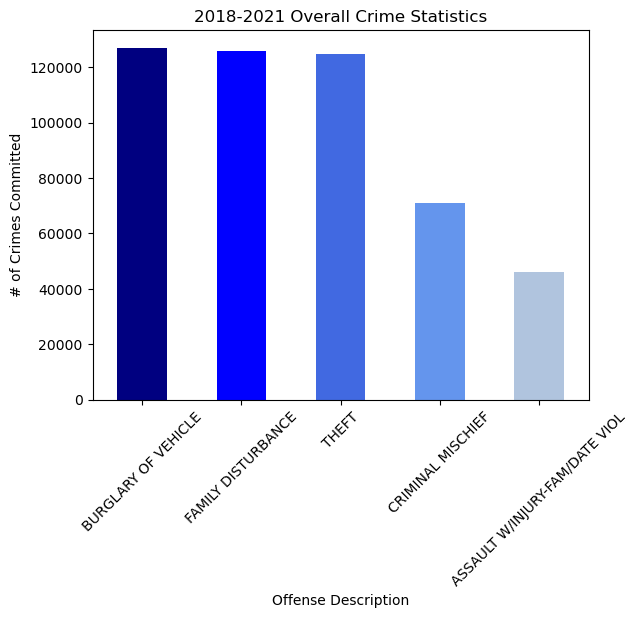

In [181]:
#make a chart here showing 2018-2021 with the crime statistics taken from each year on total offense count 
import matplotlib.pyplot as plt

# Assuming clean_crime_data_df is your DataFrame containing crime data

# Extracting top 5 offenses from 2018 to 2021
clean_data_chart = clean_crime_data_df['Highest Offense Description'].value_counts().nlargest(5)

# Plotting the bar chart
plot_panda = clean_data_chart.plot.bar(color=['#000080', '#0000FF', '#4169E1', '#6495ED', '#B0C4DE'])  # Shades of blue from darkest to brightest

# Adding title and labels
plt.title("2018-2021 Overall Crime Statistics")
plt.ylabel("# of Crimes Committed")
plt.xlabel("Offense Description")
plt.xticks(rotation=45)

# Saving the plot
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

# Displaying the total number of crimes for the top 5 offenses
print("Total offenses for top 5 crimes:", clean_crime_data_df['Highest Offense Description'].value_counts().nlargest(5).sum())


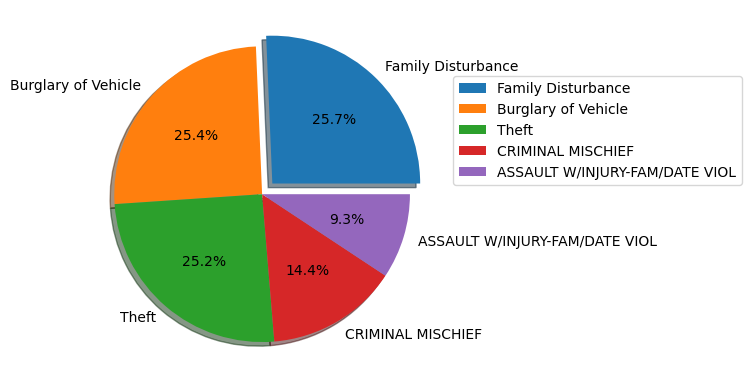

494516

In [182]:
#make a pie chart here showing 2018-2021 with the crime statistics taken from each year on total offence count 
y = clean_crime_data_df['Highest Offense Description'].value_counts().nlargest(5)
mylabels = ["Family Disturbance", "Burglary of Vehicle", "Theft", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL"]
myexplode = [0.1, 0, 0, 0, 0]
plt.pie(y, labels = mylabels, shadow = True, explode = myexplode, autopct='%1.1f%%')
plt.legend(title = "Total Crimes Committed:")
plt.legend(bbox_to_anchor=(0.8,0.5), loc="lower left", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()
clean_crime_data_df['Highest Offense Description'].value_counts().nlargest(5).sum()

## 2018 Statistics for Top 5 Highest Offense Crimes

Total offenses for top 5 crimes in 2018: 38410


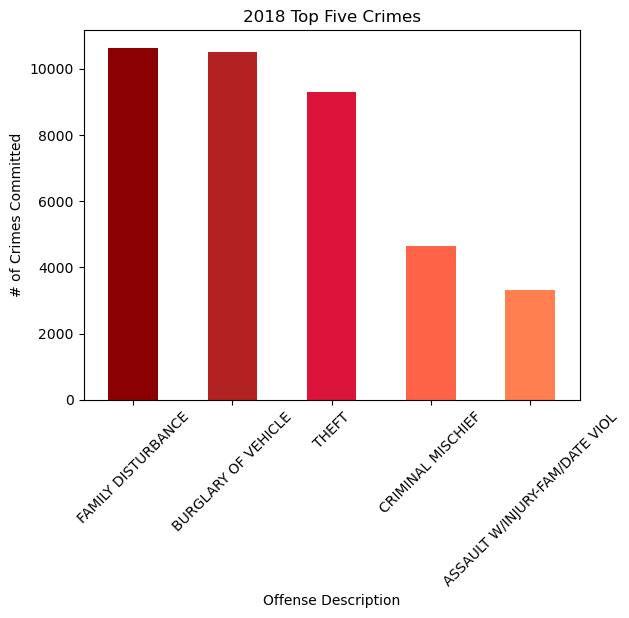

In [183]:
# Extracting top 5 offenses from 2018
clean_data_chart_1 = highest_offense_2018['Highest Offense Description'].value_counts().nlargest(5)

# Define custom shades of red in reverse order
colors = ['#8B0000', '#B22222', '#DC143C', '#FF6347', '#FF7F50']  

# Plotting the bar chart with custom colors
plot_panda = clean_data_chart_1.plot.bar(color=colors)

# Adding title and labels
plt.title("2018 Top Five Crimes")
plt.ylabel("# of Crimes Committed")
plt.xlabel("Offense Description")
plt.xticks(rotation=45)

# Saving the plot
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')

# Displaying the total number of crimes for the top 5 offenses in 2018
print("Total offenses for top 5 crimes in 2018:", highest_offense_2018['Highest Offense Description'].value_counts().nlargest(5).sum())


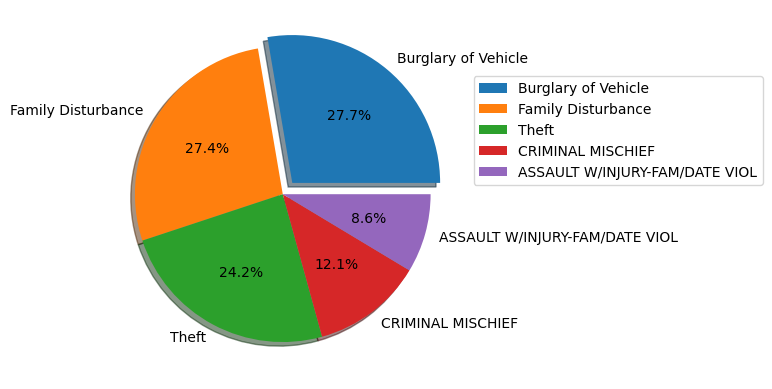

FAMILY DISTURBANCE                10636
BURGLARY OF VEHICLE               10521
THEFT                              9298
CRIMINAL MISCHIEF                  4645
ASSAULT W/INJURY-FAM/DATE VIOL     3310
Name: Highest Offense Description, dtype: int64

In [184]:
#make a pie chart here showing 2018 with the crime statistics taken from each year on total offence count 
y = highest_offense_2018['Highest Offense Description'].value_counts().nlargest(5)
mylabels = ["Burglary of Vehicle", "Family Disturbance", "Theft", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL"]
myexplode = [0.1, 0, 0, 0, 0]
plt.pie(y, labels = mylabels, shadow = True, explode = myexplode,autopct='%1.1f%%')
plt.legend(title = "Total Crimes Committed:")
#plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(0.8,0.5), loc="lower left", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()
highest_offense_2018['Highest Offense Description'].value_counts().nlargest(5)

## 2019 Statistics for Top 5 Highest Offense Crimes

Total offenses for top 5 crimes in 2019: 40670


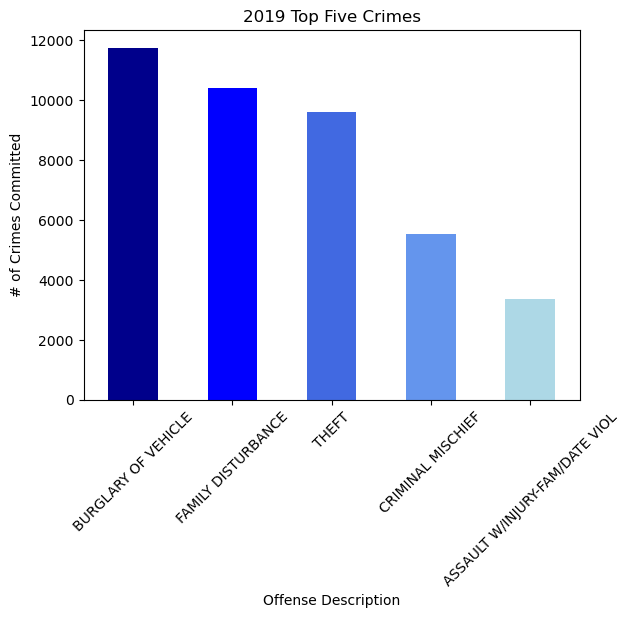

In [185]:
# Extracting top 5 offenses from 2019
clean_data_chart_1 = highest_offense_2019['Highest Offense Description'].value_counts().nlargest(5)

# Define custom shades of blue
colors = ['#00008B', '#0000FF', '#4169E1', '#6495ED', '#ADD8E6']  

# Plotting the bar chart with custom colors
plot_panda = clean_data_chart_1.plot.bar(color=colors)

# Adding title and labels
plt.title("2019 Top Five Crimes")
plt.ylabel("# of Crimes Committed")
plt.xlabel("Offense Description")
plt.xticks(rotation=45)

# Saving the plot
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')

# Displaying the total number of crimes for the top 5 offenses in 2019
print("Total offenses for top 5 crimes in 2019:", highest_offense_2019['Highest Offense Description'].value_counts().nlargest(5).sum())




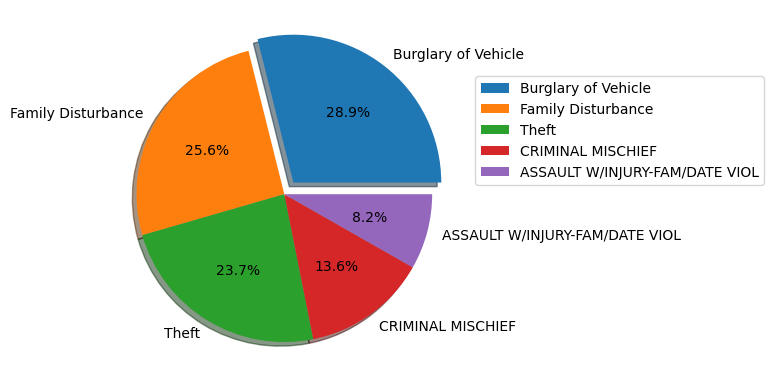

BURGLARY OF VEHICLE               11754
FAMILY DISTURBANCE                10401
THEFT                              9624
CRIMINAL MISCHIEF                  5540
ASSAULT W/INJURY-FAM/DATE VIOL     3351
Name: Highest Offense Description, dtype: int64

In [186]:
#make a pie chart here showing 2019 with the crime statistics taken from each year on total offence count 
y = highest_offense_2019['Highest Offense Description'].value_counts().nlargest(5)
mylabels = ["Burglary of Vehicle", "Family Disturbance", "Theft", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL"]
myexplode = [0.1, 0, 0, 0, 0]
plt.pie(y, labels = mylabels, shadow = True, explode = myexplode,autopct='%1.1f%%')
plt.legend(title = "Total Crimes Committed:")
#plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(0.8,0.5), loc="lower left", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()
highest_offense_2019['Highest Offense Description'].value_counts().nlargest(5)

##  2020 Statistics for Top 5 Highest Offense Crimes

Total offenses for top 5 crimes in 2020: 37174


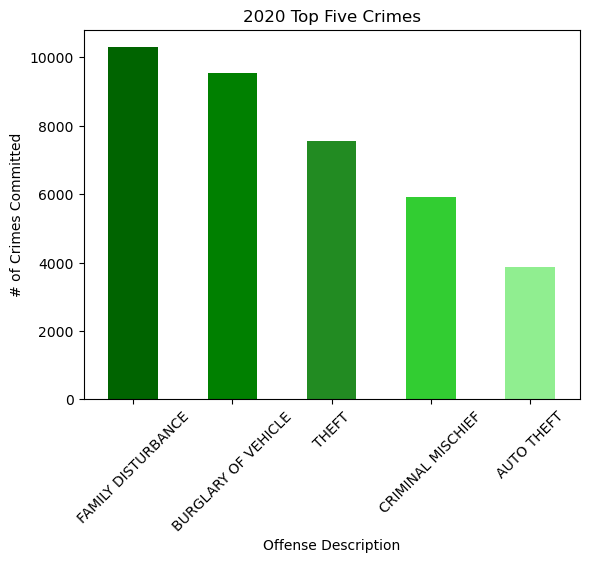

In [187]:
# Extracting top 5 offenses from 2020
clean_data_chart_2 = highest_offense_2020['Highest Offense Description'].value_counts().nlargest(5)

# Define custom shades of green
colors = ['#006400', '#008000', '#228B22', '#32CD32', '#90EE90']  

# Plotting the bar chart with custom colors
plot_panda = clean_data_chart_2.plot.bar(color=colors)

# Adding title and labels
plt.title("2020 Top Five Crimes")
plt.ylabel("# of Crimes Committed")
plt.xlabel("Offense Description")
plt.xticks(rotation=45)

# Saving the plot
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')

# Displaying the total number of crimes for the top 5 offenses in 2020
print("Total offenses for top 5 crimes in 2020:", highest_offense_2020['Highest Offense Description'].value_counts().nlargest(5).sum())


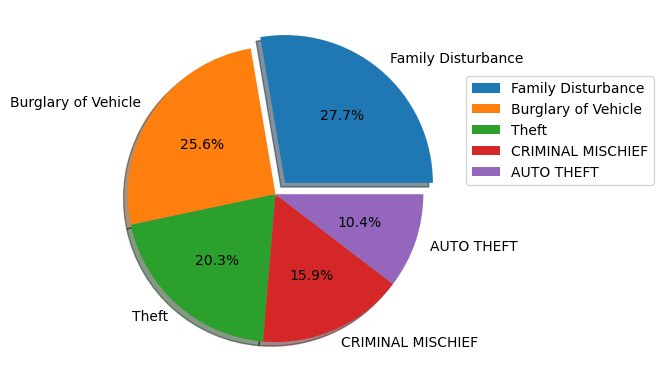

FAMILY DISTURBANCE     10289
BURGLARY OF VEHICLE     9532
THEFT                   7563
CRIMINAL MISCHIEF       5926
AUTO THEFT              3864
Name: Highest Offense Description, dtype: int64

In [188]:
#Make a pie chart for 2020 top 5 crimes
y = highest_offense_2020['Highest Offense Description'].value_counts().nlargest(5)
mylabels = ["Family Disturbance", "Burglary of Vehicle", "Theft", "CRIMINAL MISCHIEF", "AUTO THEFT"]
myexplode = [0.1, 0, 0, 0, 0]
plt.pie(y, labels = mylabels, shadow = True, explode = myexplode, autopct='%1.1f%%')
plt.legend(title = "Total Crimes Committed:")
plt.legend(bbox_to_anchor=(0.8,0.5), loc="lower left", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')
plt.show()
highest_offense_2020['Highest Offense Description'].value_counts().nlargest(5)

## 2021 Statistics for Top 5 Highest Offense Crimes

Total offenses for top 5 crimes in 2021: 29300


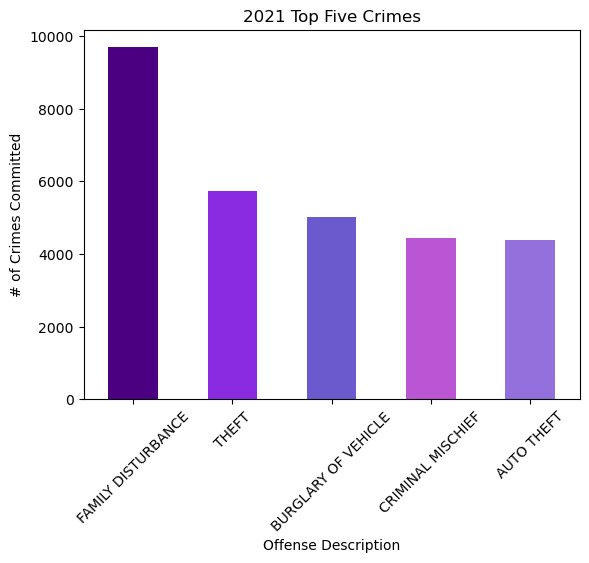

In [189]:
import matplotlib.pyplot as plt

# Assuming highest_offense_2021 is your DataFrame containing crime data for 2021

# Extracting top 5 offenses from 2021
clean_data_chart_3 = highest_offense_2021['Highest Offense Description'].value_counts().nlargest(5)

# Define custom shades of purple
colors = ['#4B0082', '#8A2BE2', '#6A5ACD', '#BA55D3', '#9370DB']  

# Plotting the bar chart with custom colors
plot_panda = clean_data_chart_3.plot.bar(color=colors)

# Adding title and labels
plt.title("2021 Top Five Crimes")
plt.ylabel("# of Crimes Committed")
plt.xlabel("Offense Description")
plt.xticks(rotation=45)

# Saving the plot
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')

# Displaying the total number of crimes for the top 5 offenses in 2021
print("Total offenses for top 5 crimes in 2021:", highest_offense_2021['Highest Offense Description'].value_counts().nlargest(5).sum())


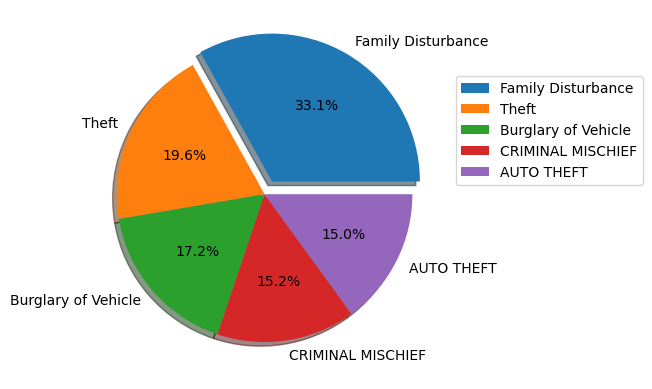

FAMILY DISTURBANCE     9688
THEFT                  5748
BURGLARY OF VEHICLE    5028
CRIMINAL MISCHIEF      4441
AUTO THEFT             4395
Name: Highest Offense Description, dtype: int64

In [190]:
#make a pie chart showing top 5 crimes of 2021
y = highest_offense_2021['Highest Offense Description'].value_counts().nlargest(5)
mylabels = ["Family Disturbance", "Theft", "Burglary of Vehicle", "CRIMINAL MISCHIEF", "AUTO THEFT"]
myexplode = [0.1, 0, 0, 0, 0]
plt.pie(y, labels = mylabels, shadow = True, explode = myexplode,autopct='%1.1f%%')
plt.legend(title = "Total Crimes Committed:")
plt.legend(bbox_to_anchor=(0.8,0.5), loc="lower left", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
plt.show()
highest_offense_2021['Highest Offense Description'].value_counts().nlargest(5)

## Summary Statistics for Top 3 Highest Offense Crimes

In [191]:
#create variables to utilize in your overall summary charts 
#2018
Family_2018 = len(highest_offense_2018[highest_offense_2018['Highest Offense Description'] == "FAMILY DISTURBANCE"])
Burglary_2018 = len(highest_offense_2018[highest_offense_2018['Highest Offense Description'] == "BURGLARY OF VEHICLE"])
theft_2018 = len(highest_offense_2018[highest_offense_2018['Highest Offense Description'] == "THEFT"])

#2019
Family_2019 = len(highest_offense_2019[highest_offense_2019['Highest Offense Description'] == "FAMILY DISTURBANCE"])
Burglary_2019 = len(highest_offense_2019[highest_offense_2019['Highest Offense Description'] == "BURGLARY OF VEHICLE"])
theft_2019 = len(highest_offense_2019[highest_offense_2019['Highest Offense Description'] == "THEFT"])

#2020
Family_2020 = len(highest_offense_2020[highest_offense_2020['Highest Offense Description'] == "FAMILY DISTURBANCE"])
Burglary_2020= len(highest_offense_2020[highest_offense_2020['Highest Offense Description'] == "BURGLARY OF VEHICLE"])
theft_2020 = len(highest_offense_2020[highest_offense_2020['Highest Offense Description'] == "THEFT"])

#2021
Family_2021 = len(highest_offense_2021[highest_offense_2021['Highest Offense Description'] == "FAMILY DISTURBANCE"])
Burglary_2021 = len(highest_offense_2021[highest_offense_2021['Highest Offense Description'] == "BURGLARY OF VEHICLE"])
theft_2021 = len(highest_offense_2021[highest_offense_2021['Highest Offense Description'] == "THEFT"])





## All 4 years of Family Disturbance

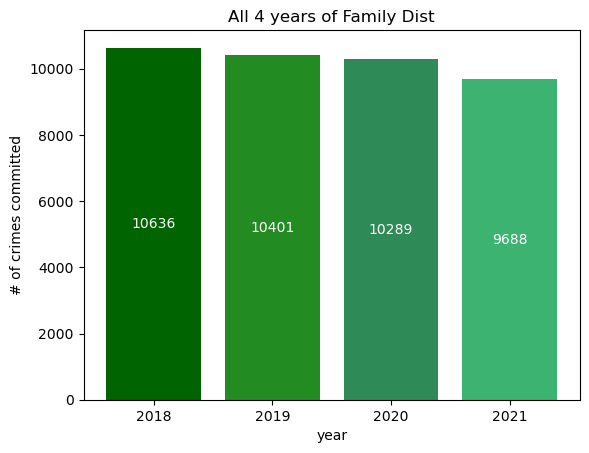

[10636, 10401, 10289, 9688]

In [192]:
Family_dis = [Family_2018 ,Family_2019, Family_2020, Family_2021]
years = ["2018","2019", "2020", "2021"]
plt.bar(years, Family_dis)
plt.title("All 4 years of Family Dist")
colors = ['#006400', '#228B22', '#2E8B57', '#3CB371']

plt.bar(years, Family_dis, color=colors)
plt.ylabel("# of crimes committed")
plt.xlabel("year")
bar_width = 0.1

plt.bar(years, Family_dis, color=colors, width=bar_width)
for i, num in enumerate(Family_dis):
    plt.text(i, num / 2, str(num), ha='center', va='center', color='white')

plt.savefig('plot8.png', dpi=300, bbox_inches='tight')
plt.show()
Family_dis

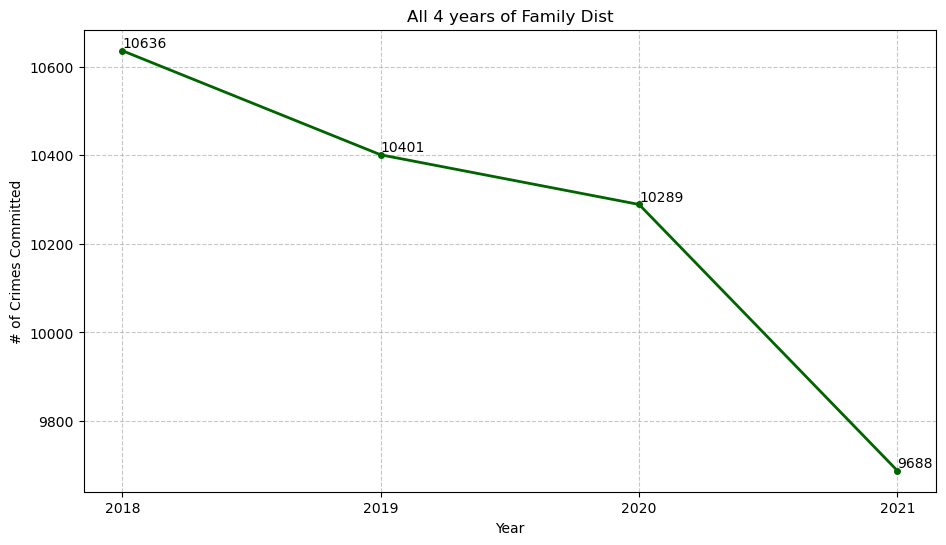

In [193]:
Family_dis = [Family_2018, Family_2019, Family_2020, Family_2021]
years = ["2018", "2019", "2020", "2021"]

plt.figure(figsize=(11, 6))  # Set the figure size

plt.plot(years, Family_dis, marker='o', color='#006400', linestyle='-', linewidth=2, markersize=4)

plt.title("All 4 years of Family Dist")
plt.xlabel("Year")
plt.ylabel("# of Crimes Committed")

plt.grid(True, linestyle='--', alpha=0.7)

for i, num in enumerate(Family_dis):
    plt.text(years[i], num, str(num), ha='left', va='bottom', color='black')  # Change the text color to black

plt.savefig('plot8.png', dpi=300, bbox_inches='tight')
plt.show()




## All 4 years of Burglary

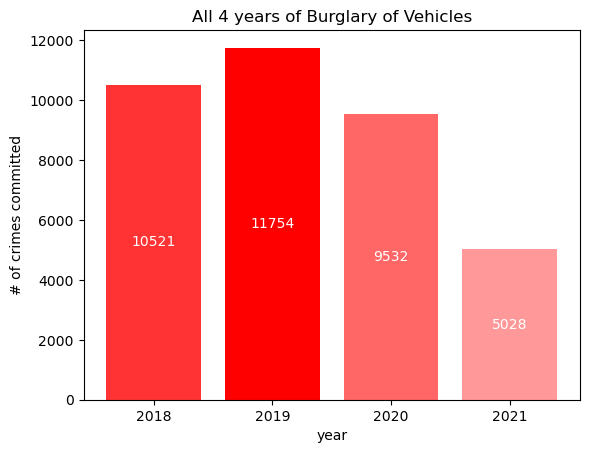

[10521, 11754, 9532, 5028]

In [194]:
Burg_veh = [Burglary_2018 ,Burglary_2019, Burglary_2020, Burglary_2021]
years = ["2018","2019", "2020", "2021"]
plt.bar(years, Burg_veh)
plt.title("All 4 years of Burglary of Vehicles")
colors = ['#FF3333','#FF0000' , '#FF6666', '#FF9999']

plt.bar(years, Burg_veh, color=colors)
plt.ylabel("# of crimes committed")
plt.xlabel("year")
bar_width = 0.3

plt.bar(years, Burg_veh, color=colors, width=bar_width)
for i, num in enumerate(Burg_veh):
    plt.text(i, num / 2, str(num), ha='center', va='center', color='white')

plt.savefig('plot9.png', dpi=300, bbox_inches='tight')
plt.show()
Burg_veh


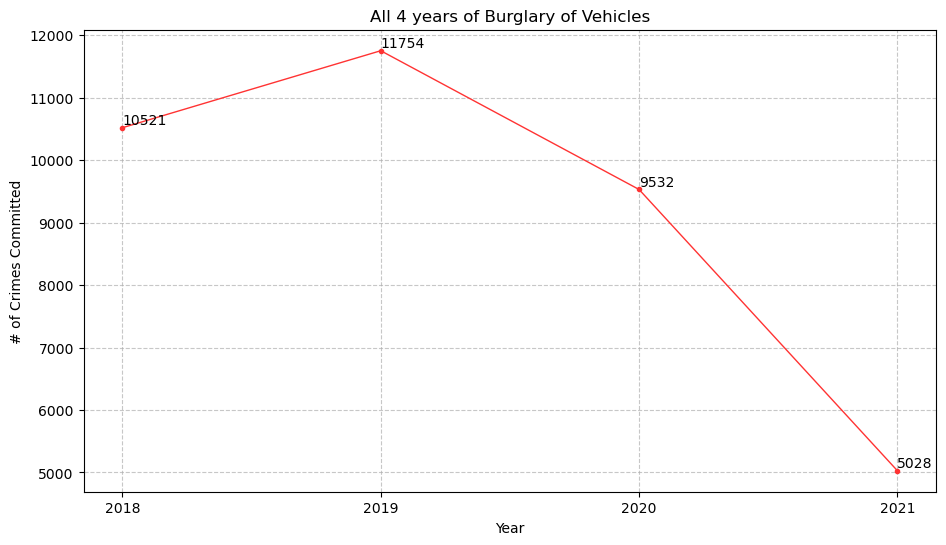

In [195]:


import matplotlib.pyplot as plt

Burg_veh = [Burglary_2018, Burglary_2019, Burglary_2020, Burglary_2021]
years = ["2018", "2019", "2020", "2021"]

plt.figure(figsize=(11, 6))  # Set the figure size

plt.plot(years, Burg_veh, marker='o', color='#FF3333', linestyle='-', linewidth=1, markersize=3)

plt.title("All 4 years of Burglary of Vehicles")
plt.xlabel("Year")
plt.ylabel("# of Crimes Committed")

plt.grid(True, linestyle='--', alpha=0.7)

for i, num in enumerate(Burg_veh):
    plt.text(years[i], num, str(num), ha='left', va='bottom', color='black')  # Change the color to black

plt.savefig('plot9.png', dpi=300, bbox_inches='tight')
plt.show()




## All 4 years of Theft

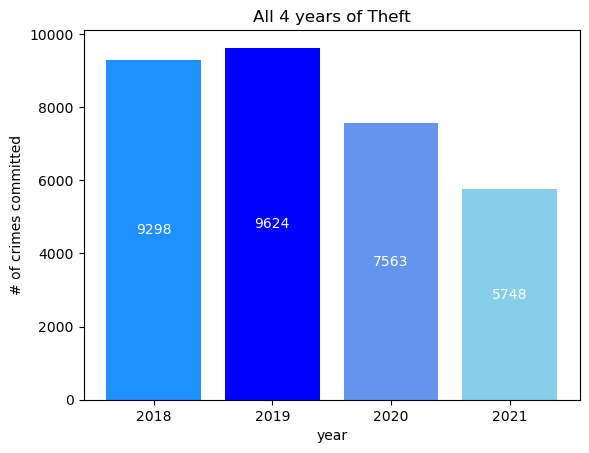

[9298, 9624, 7563, 5748]

In [196]:
theft = [theft_2018 ,theft_2019, theft_2020, theft_2021]
years = ["2018" ,"2019", "2020", "2021"]
plt.bar(years, theft)
plt.title("All 4 years of Theft")
colors = ['#1E90FF', '#0000FF', '#6495ED', '#87CEEB']

plt.bar(years, theft, color=colors)
plt.ylabel("# of crimes committed")
plt.xlabel("year")
bar_width = 0.3

plt.bar(years, theft, color=colors, width=bar_width)
for i, num in enumerate(theft):
    plt.text(i, num / 2, str(num), ha='center', va='center', color='white')


plt.savefig('plot10.png', dpi=300, bbox_inches='tight')
plt.show()
theft


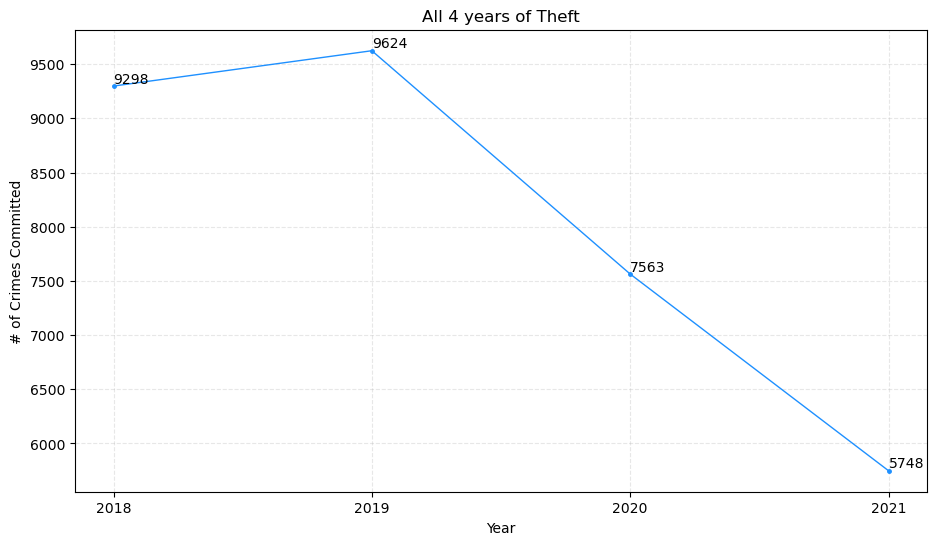

In [197]:
theft = [theft_2018, theft_2019, theft_2020, theft_2021]
years = ["2018", "2019", "2020", "2021"]

plt.figure(figsize=(11, 6))  # Set the figure size

plt.plot(years, theft, marker='o', color='#1E90FF', linestyle='-', linewidth=1, markersize=2.5)

plt.title("All 4 years of Theft")
plt.xlabel("Year")
plt.ylabel("# of Crimes Committed")

plt.grid(True, linestyle='--', alpha=0.3)

for i, num in enumerate(theft):
    plt.text(years[i], num, str(num), ha='left', va='bottom', color='black', fontsize=10)  # Change the color to black

plt.savefig('plot10.png', dpi=300, bbox_inches='tight')
plt.show()



